In [5]:
import matplotlib.pyplot as plt
import numpy as np


#Enviroment variables of the problem
k=10
T=1000

#Statistic vectors for ε-greedy
eg_pulls = np.zeros(k)
eg_estimate_M = np.zeros(k) #estimated 
eg_total_rewards = np.zeros(k) #total for estimation
eg_inst_score = np.zeros(T) #score for timestep T
eg_best_score = np.zeros(T) # cumulative reward of best arm for timestep T
eg_alg_score = np.zeros(T) #cumulative reward for timestep T 
eg_regret = np.zeros(T) # regret for timestep T


#Statistic vectors for UCB
ucb_pulls = np.zeros(k)
ucb_estimate_M = np.zeros(k) #estimated 
ucb_total_rewards = np.zeros(k) #total for estimation
ucb_inst_score = np.zeros(T) #score for timestep T
ucb_best_score = np.zeros(T) # cumulative reward of best arm for timestep T
ucb_alg_score = np.zeros(T) #cumulative reward for timestep T 
ucb_regret = np.zeros(T) # regret for timestep T


#Produce reward related variables
a = np.random.random(k)
b = np.random.random(k)

#Make sure random bounds are in correct order
for i in range(k):
    if(a[i] > b[i]):
        a[i],b[i] = b[i],a[i]

#This is the vector containing the mean reward for each bandit k
mean = (a+b)/2

#The best reward among k bandits
best = np.max(mean)
        
#Simulate the pull of a bandit i and return the reward that produces
def pull(i):
    return np.random.uniform(a[i],b[i])

In [6]:
#--------------------------- ε-greedy ----------------------------#
def update_stats_epsilon(reward,i,t):
    eg_pulls[i] += 1 #Total number bandit i has been pulled
    eg_inst_score[t] = reward #Reward got for timestep t
    eg_total_rewards[i] += reward #Total rewards of bandit i
    eg_best_score[t] = eg_best_score[t-1] + best #Cumulative best mean score over time
    eg_alg_score[t] = eg_alg_score[t-1] + eg_inst_score[t] #Cumulative score of algorithm over time
    eg_estimate_M[i] = eg_total_rewards[i] / eg_pulls[i] #Based on the theory we maintain an estimate mu for each bandit i
    #Regret over time is the c.best reward minus the c.score that the algorithm got
    eg_regret[t] = (eg_best_score[t] - eg_alg_score[t])/(t+1) 


eps=5.0 #select eps big enough to start with random bandit

# Actual execution of the e-greedy alg
for t in range(1,T):
    #Select random bandit if eps is very big
    if np.random.rand() < eps: 
        kth = np.random.randint(k)
        reward = pull(kth)
        update_stats_epsilon(reward, kth, t)
    else:
        kth = np.argmax(eg_estimate_M) #select k bandit
        reward = pull(kth) 
        update_stats_epsilon(reward, kth, t) #update the concerning stats 
    
    #Reduce tuning param eps according to the theorem
    eps = np.power(t,-1/3) * np.power(k*np.log(t), 1/3)

In [ ]:
#----------------------------- UCB -------------------------------#
def update_stats_ucb(reward,i,t):
    ucb_pulls[i] += 1 #Total number bandit i has been pulled
    ucb_inst_score[t] = reward #Reward got for timestep t
    ucb_total_rewards[i] += reward #Total rewards of bandit i
    ucb_best_score[t] = ucb_best_score[t-1] + best  #Cumulative best mean score over time
    ucb_alg_score[t] = ucb_alg_score[t-1] + ucb_inst_score[t] #Cumulative score of algorithm over time
    ucb_estimate_M[i] = ucb_total_rewards[i] / ucb_pulls[i] #Based on the theory we maintain an estimate mu for each bandit i
    #Regret over time is the c.best reward minus the c.score that the algorithm got
    ucb_regret[t] = (ucb_best_score[t] - ucb_alg_score[t])/(t+1)


for t in range(1,T):
    #This is the root quantity - Diverse the denominator by a small number to avoid zero div exceptions at first pulls
    #Some may still occur...
    explorationInterval = np.sqrt(np.log(T)/ucb_pulls + 0.0000001)

    #Select the i-th bandit which has the max UCB
    kth = np.argmax(ucb_estimate_M + explorationInterval)
    reward = pull(kth)
    #Update the concering stats
    update_stats_ucb(reward, kth, t)

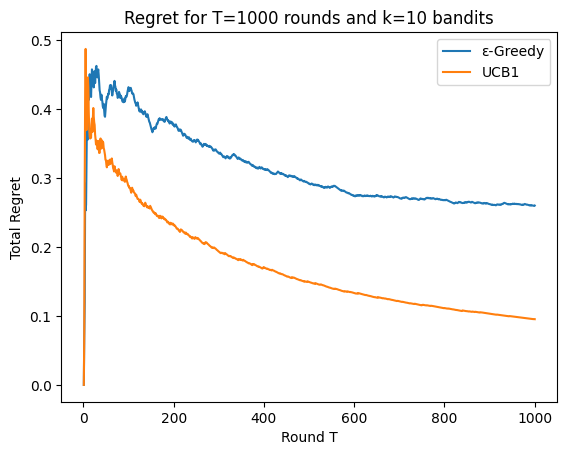

In [8]:
#--------------------------- Ploting -----------------------------#

plt.title("Regret for T=" +str(T)+ " rounds and k=" +str(k)+ " bandits") 
plt.xlabel("Round T") 
plt.ylabel("Total Regret")
plt.plot(np.arange(1,T+1),eg_regret, label='ε-Greedy') 
plt.plot(np.arange(1,T+1),ucb_regret, label='UCB1') 
plt.legend()
plt.show()
